In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.set_option("display.max_colwidth", None)
data=data[["v1","v2"]]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
data["v1"].value_counts()

,count
v1,
ham,4825
spam,747


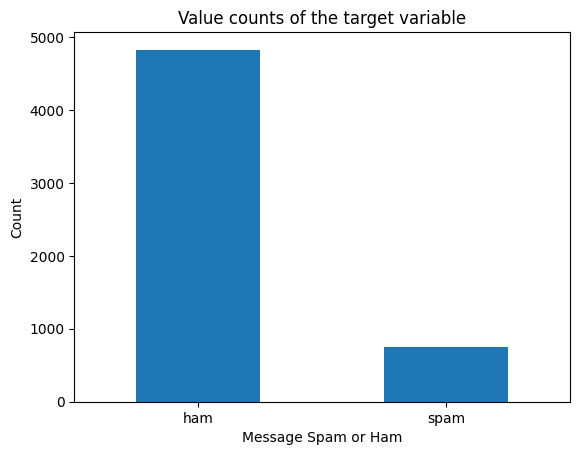

In [ ]:
import matplotlib.pyplot as plt
data.v1.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Message Spam or Ham")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [ ]:
import string
def remove_punctuation(text):
  punctuationfree =""
  for char in text:
    if char not in string.punctuation:
      punctuationfree += char
  return punctuationfree

data["clean_msg"]=data["v2"].apply(remove_punctuation)
data.head()

,v1,v2,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


In [ ]:
def lowercase_text(text):
  return text.lower()
data["msg_lower"] = data["clean_msg"].apply(lowercase_text)

data["msg_lower"]=data["clean_msg"].apply(lambda x : x.lower())
data

,v1,v2,clean_msg,msg_lower
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free


In [ ]:
import re
def tokenization(text):
  tokens = re.split(r"\W+",text)
  return tokens
data["msg_tokenied"]=data["msg_lower"].apply(tokenization)
data

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[, , , , , , , , , , , , , , , , , , , , ]","[, , , , , , , , , , , , , , , , , , , , ]",
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[, , , , , , ]","[, , , , , , ]",
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[, , , , , , , , , , , , , , , , , , , , , , , , , , , , ]","[, , , , , , , , , , , , , , , , , , , , , , , , , , , , ]",
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[, , , , , , , , , , , ]","[, , , , , , , , , , , ]",
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[, , , , , , , , , , , , , ]","[, , , , , , , , , , , , , ]",
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å, 750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[, , , , , , , , , , , , , , , , £, , , , , , , , , , , , , , , ]","[, , , , , , , , , , , , , , , , £, , , , , , , , , , , , , , , ]",£
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[, , , , , , , , ]","[, , , , , , , , ]",
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[, , , , , , , , , ]","[, , , , , , , , , ]",
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwards = nltk.corpus.stopwords.words("english")
print("Preview of Stopwards Corplus:",stopwards[0:20])

Preview of Stopwards Corplus: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
print("Preview of Stopwords Corpus : ", stopwords[0:10])

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data

Preview of Stopwords Corpus :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[, , , , , , , , , , , , , , , , , , , , ]",
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[, , , , , , ]",
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[, , , , , , , , , , , , , , , , , , , , , , , , , , , , ]",
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[, , , , , , , , , , , ]",
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[, , , , , , , , , , , , , ]",
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å, 750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å, 750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[, , , , , , , , , , , , , , , , £, , , , , , , , , , , , , , , ]",£
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[, , , , , , , , ]",
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[, , , , , , , , , ]",
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next 

In [ ]:
#importing nlp library for performing stemming
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = []
    for word in text:
        stem_word = porter_stemmer.stem(word)
        stem_text.append(stem_word)
    return stem_text

data['msg_stemmed'] = data['no_stopwords'].apply(stemming)
data

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]",
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]",
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]",
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å, 750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å, 750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[2nd, time, tri, 2, contact, u, u, å, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]",£
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]",
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pi

In [ ]:
#importing nlp library for performing Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemm_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemm_word)
    return lemm_text

# Applying the lemmatization function to the column
data['msg_lemmatized'] = data['no_stopwords'].apply(lemmatizer)
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å, 750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å, 750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[2nd, time, tri, 2, contact, u, u, å, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]","[2nd, time, tried, 2, contact, u, u, å, 750, pound, prize, 2, claim, easy, call, 

In [ ]:
# Assuming 'msg_lemmatized' column contains lists of lemmatized words, convert them to strings
data['msg_lemmatized'] = data['msg_lemmatized'].apply(lambda x: ' '.join(x))
data

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]",nah dont think go usf life around though
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å, 750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å, 750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[2nd, time, tri, 2, contact, u, u, å, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]",2nd time tried 2 contact u u å 750 pound prize 2 claim easy call 087187272008 now1 10p per minute btnationalrate
5568,ham,Will Ì_ b going to esplanade fr home?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['msg_lemmatized'])
y = data['v1']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Get the non-zero elements and their positions
non_zero_elements = X.nonzero()
rows, cols = non_zero_elements
values = X.data

# Display the first 10 non-zero elements and their positions
for i in range(10):
    print(f"Element at ({rows[i]}, {cols[i]}): {values[i]}")

Element at (0, 8349): 0.1989735621482012
Element at (0, 1153): 0.34897083476079455
Element at (0, 3638): 0.16394005641748216
Element at (0, 2123): 0.29481197139266213
Element at (0, 1811): 0.33313038268477546
Element at (0, 4577): 0.29481197139266213
Element at (0, 8566): 0.2371521973992585
Element at (0, 3676): 0.1942323136391732
Element at (0, 1813): 0.29481197139266213
Element at (0, 1377): 0.265364095674063


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Model Building | Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9632286995515695
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.87      0.85      0.86       150

    accuracy                           0.96      1115
   macro avg       0.92      0.92      0.92      1115
weighted avg       0.96      0.96      0.96      1115



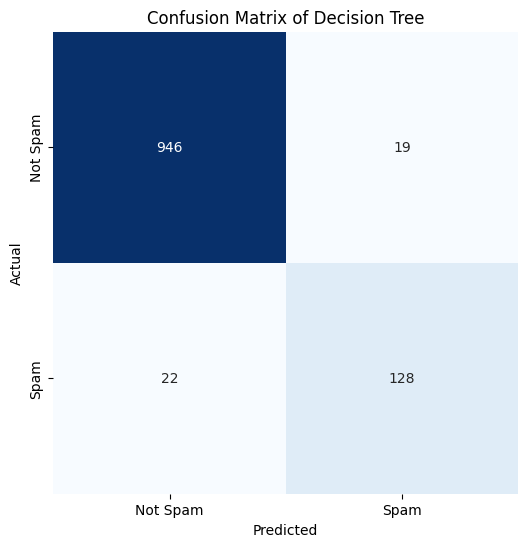

In [ ]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9757847533632287
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



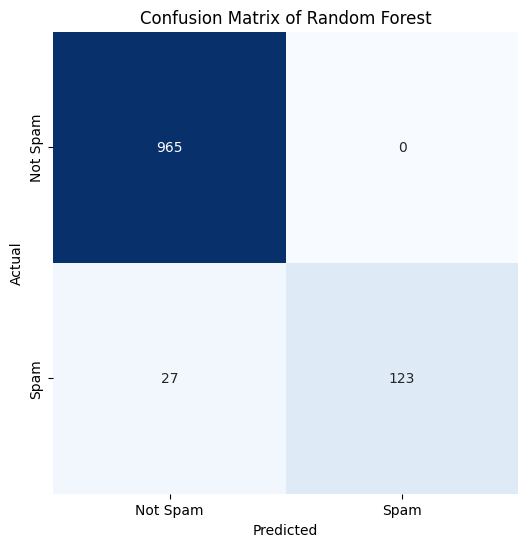

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [ ]:
import joblib

# Assuming tfidf_vectorizer is your trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Assuming model is your trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
def preprocess_text(text):
  text = remove_punctuation(text)
  lowercase_text(text)
  remove_stopwords(text)
  tokenization(text)
  lemmatizer(text)
  return text

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained Random Forest model
model = joblib.load('random_forest_model.pkl')  # Replace with your model's filename

# Load the TF-IDF vectorizer (you'll need the same one used during training)
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Replace with your vectorizer's filename

# Preprocess user input and make a prediction
def predict_spam(input_text):
    # Preprocess the user input (e.g., cleaning, lemmatization)
    preprocessed_text = preprocess_text(input_text)  # Implement your preprocessing function

    # Transform the preprocessed text using TF-IDF vectorizer
    input_features = tfidf_vectorizer.transform([preprocessed_text])

    # Make a prediction using the loaded model
    prediction = model.predict(input_features)

    return prediction[0]

# Input from the user
user_input = input("Enter a message: ")

# Get the prediction
result = predict_spam(user_input)

# Display the result
if result == 'ham':
    print("This message is not spam.")
else:
    print("This message is spam.")

Enter a message: England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 870...
This message is spam.
